In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the MNIST dataset
# This downloads 60,000 training images and 10,000 testing images
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
# 2. Preprocess the data
# Normalize pixel values to be between 0 and 1 (from 0-255)
x_train, x_test = x_train / 255.0, x_test / 255.0

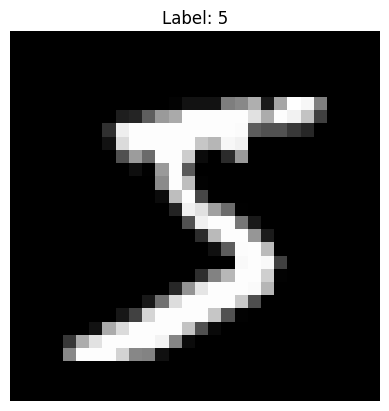

In [42]:
image_index = 0
image = x_train[image_index]
label = y_train[image_index]
# 3. Use Matplotlib to display the image
plt.imshow(image, cmap='gray') # 'gray' or 'Greys' colormap works well for B&W
plt.title(f"Label: {label}") # Add the actual label as a title
plt.axis('off') # Hide the axis ticks for a cleaner look
plt.show()

In [44]:
# 3. Build the Neural Network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    # Dropout prevents overfitting by randomly setting 20% of inputs to 0
    layers.Dropout(0.2),
    # Output layer with 10 neurons (one for each digit 0-9)
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# 5. Train the model
print("Starting training...")
model.fit(x_train, y_train, epochs=5)

Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8602 - loss: 0.4840
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9531 - loss: 0.1534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9676 - loss: 0.1092
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9731 - loss: 0.0862
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9769 - loss: 0.0732


In [47]:
# 6. Evaluate the model on unseen test data
print("\nEvaluating on test data:")
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')


Evaluating on test data:
313/313 - 1s - 3ms/step - accuracy: 0.9776 - loss: 0.0745

Test Accuracy: 97.76%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


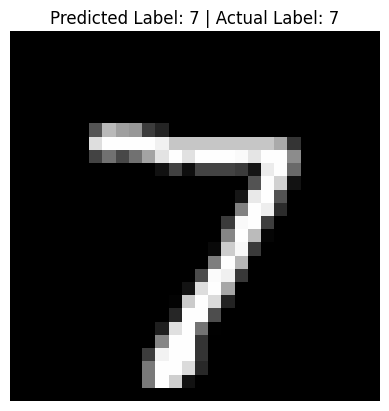

In [36]:
# 7. Make a prediction and visualize it
# Let's predict the first image in the test set
prediction = model.predict(x_test[:1])
predicted_label = np.argmax(prediction)
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {predicted_label} | Actual Label: {y_test[0]}")
plt.axis('off')
plt.show()

In [37]:
import joblib
# Save the model to a .pkl file
joblib.dump(model, 'mnist_model_joblib.pkl')
print("Model saved as mnist_model_joblib.pkl")

Model saved as mnist_model_joblib.pkl


In [39]:
import os
def get_model_memory_size(model):
    # Total parameters * 4 bytes (for float32)
    num_params = model.count_params()
    size_bytes = num_params * 4
    size_mb = size_bytes / (1024 * 1024)
    return num_params, size_mb

params, memory_mb = get_model_memory_size(model)
file_size_kb = os.path.getsize('mnist_model_joblib.pkl') / 1024

print(f"Total Parameters: {params:,}")
print(f"Estimated Runtime Memory Size: {memory_mb:.4f} MB")
print(f"Pickle File Size on Disk: {file_size_kb:.2f} KB")

Total Parameters: 101,770
Estimated Runtime Memory Size: 0.3882 MB
Pickle File Size on Disk: 1218.02 KB


In [48]:
loaded_model = joblib.load('mnist_model_joblib.pkl')
print("Model loaded successfully!")

Model loaded successfully!



Making prediction with loaded model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


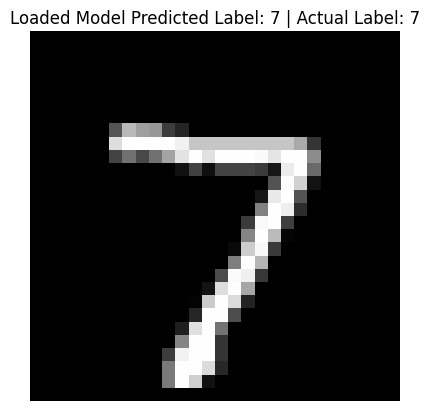

In [50]:
print("\nMaking prediction with loaded model...")
loaded_prediction = loaded_model.predict(x_test[:1])
loaded_predicted_label = np.argmax(loaded_prediction)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Loaded Model Predicted Label: {loaded_predicted_label} | Actual Label: {y_test[0]}")
plt.axis('off')
plt.show()

In [51]:
print("\nEvaluating loaded model on test data:")
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f'\nLoaded Model Test Accuracy: {loaded_test_acc*100:.2f}%')


Evaluating loaded model on test data:
313/313 - 1s - 4ms/step - accuracy: 0.9780 - loss: 0.0735

Loaded Model Test Accuracy: 97.80%
